# APS failure predictions
this task is a device to prediction model for judging whether a vehicle failure of APS system

In [15]:
#import library
import pandas as pd ## for read the data set
import numpy as np ##for mathematical calculations
import seaborn as sns ## for  data vizualization
import matplotlib.pyplot as plt ## for data vizualization

##import scikit learn library
from sklearn.model_selection import train_test_split ## for spiliting the data
from sklearn.pipeline import make_pipeline #make pipeline

## machine learning libary
from sklearn.naive_bayes import GaussianNB  ## naive bayse
from sklearn.ensemble import RandomForestClassifier ##random forest

## model evaluation
from sklearn.metrics import accuracy_score ##for accuracy_score
from sklearn.metrics import f1_score ## for f1 score
from sklearn.metrics import roc_curve ## for roc  curve
from sklearn.metrics import roc_auc_score ## for roc_auc_curve
from sklearn.metrics import classification_report #defining the final classification report 

In [2]:
##read all the data  by useing pandas library
train_data1=pd.read_csv("aps_failure_training_set_processed_8bit.csv")
train_data2=pd.read_csv("aps_failure_training_set.csv")
test_data1=pd.read_csv("aps_failure_test_set_processed_8bit.csv")
test_data2=pd.read_csv("aps_failure_test_set.csv")

In [3]:
#shape of all the data
train_data1.shape,test_data1.shape,train_data2.shape,test_data2.shape

((60000, 171), (16000, 171), (60000, 171), (16000, 171))

In [4]:
##combine all the data 
df1=pd.concat([train_data1,test_data1])
df2=pd.concat([train_data2,test_data2])
data=pd.concat([df1,df2])
data.shape

(152000, 171)

In [5]:
# here in  ourdata there is many na value so we will convert it into nan value 
data.replace('na',np.nan,inplace=True)

In [6]:

# Calculating the percentage of values missing in each column of our dataset
percent_missing= (data.isnull().sum() * 100) / len(data)
#calclulate column which have more than 30% of missing value 
columns_to_drop = percent_missing[percent_missing > 30].index
#drop the column which have missing value mare then 30 %
data.drop(columns=columns_to_drop,inplace=True)

In [7]:
data

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.992188,0.117188,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.6875,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.992188,-0.179688,-0.46875,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.023438,-0.0625,-0.132812,-0.132812,-0.1875,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,-0.992188,-0.125000,-0.46875,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.140625,-0.09375,-0.015625,0.015625,-0.007812,-0.109375,-0.09375,-0.164062,-0.023438,-0.023438
3,-0.992188,-0.406250,-0.46875,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.375,-0.351562,-0.3125,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,-0.992188,0.007812,-0.46875,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.15625,0.03125,-0.03125,-0.039062,-0.046875,-0.015625,0.65625,-0.148438,-0.023438,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852.000000,2130706432,892,0,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18.000000,52,46,8,26,0,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636.000000,1670,1518,0,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110.000000,36,32,0,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [8]:
co=data.columns

In [9]:
#here we will prepare our label_data
data['class'].replace(to_replace=(-0.9921875,0.9921875),value=(0,1),inplace=True)
data['class'].replace(to_replace=['neg','pos'],value=(0,1),inplace=True)

In [10]:
#replace all missing value by 0
data.fillna(0,inplace=True)

In [11]:
#split our data in features and label
x=data.drop(columns=['class'])
y=data['class']

C:\Users\kabir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

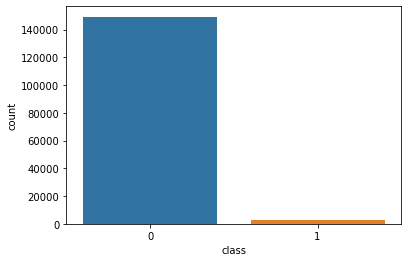

In [12]:
# vizalizations of our labels
sns.countplot(y)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [23]:
pipe=make_pipeline(GaussianNB())
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14683
           1       0.50      0.26      0.34       517

    accuracy                           0.97     15200
   macro avg       0.74      0.63      0.66     15200
weighted avg       0.96      0.97      0.96     15200



In [27]:
from dask.diagnostics import ProgressBar

In [28]:
with ProgressBar():
    pipe=make_pipeline(RandomForestClassifier(n_estimators=150))
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14987
           1       0.70      0.89      0.79       213

    accuracy                           0.99     15200
   macro avg       0.85      0.94      0.89     15200
weighted avg       0.99      0.99      0.99     15200

